# Get Started

After forking this notebook, run the code in the following cell:

In [1]:
# import package with helper functions 
import bq_helper

# create a helper object for this dataset
accidents = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")

Then write the code to answer the questions below

# Questions

#### 1) Which hours of the day do the most accidents occur during?
* Return a table showing how many accidents occurred in each hour of the day in 2015, sorted by the the number of accidents which occurred each hour. Use either the accident_2015 or accident_2016 table for this, and the timestamp_of_crash column (there is an hour_of_crash column, but if you use that one you won't get a chance to practice with dates).

**Hint:** You will probably want to use the [EXTRACT() function](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators#extract_1) for this.


Text(0.5,1,'Number of Accidents by Rank of Hour \n (Most to least dangerous)')

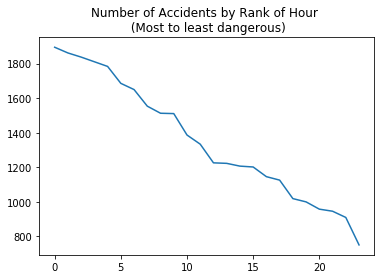

In [2]:
# import package with helper functions 
import bq_helper

# create a helper object for this dataset
accidents = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")

# query to find out the number of accidents which 
# happen on each day of the week
query = """SELECT COUNT(consecutive_number), 
                  EXTRACT(HOUR FROM timestamp_of_crash)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY EXTRACT(HOUR FROM timestamp_of_crash)
            ORDER BY COUNT(consecutive_number) DESC
        """

accidents_by_hour = accidents.query_to_pandas_safe(query)

# library for plotting
import matplotlib.pyplot as plt

# make a plot to show that our data is, actually, sorted:
plt.plot(accidents_by_hour.f0_)
plt.title("Number of Accidents by Rank of Hour \n (Most to least dangerous)")


In [3]:
accidents_by_hour

,f0_,f1_
0,1895,18
1,1862,20
2,1838,17
3,1811,21
4,1784,19
5,1686,15
6,1650,16
7,1554,22
8,1513,0
9,1511,14


#### 2) Which state has the most hit and runs?
* Return a table with the number of vehicles registered in each state that were involved in hit-and-run accidents, sorted by the number of hit and runs. Use either the vehicle_2015 or vehicle_2016 table for this, especially the registration_state_name and hit_and_run columns (it may be helpful to view the hit_and_run column to understand its contents).


In [6]:
query = """SELECT *
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            ;
        """

accidents = accidents.query_to_pandas_safe(query)
accidents.head(1)


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,trafficway_identifier_2,milepoint,latitude,longitude,special_jurisdiction,special_jurisdiction_name,first_harmful_event,first_harmful_event_name,manner_of_collision,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions_1,atmospheric_conditions_1_name,atmospheric_conditions_2,atmospheric_conditions_2_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,rail_grade_crossing_identifier,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190179,1,1,0,0,0,2,2,193,0,4,5,2015,2,16,18,0,1,Rural,5,Major Collector,2,County Highway Agency,4,County Road,CR-K42 DALLAS AVE,CR-300TH ST,0,42.272072,-96.232194,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,3,Intersection Related,Four-Way Intersection,None,4,On Roadside,1,Daylight,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,No,0000000,16,27,16,34,17,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00


In [9]:
# create a helper object for this dataset
accidents = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")

query = """SELECT state_name,count(state_name)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY state_name
            ORDER BY count(state_name) DESC
            ;
        """

accidents_state = accidents.query_to_pandas_safe(query)
accidents_state

,state_name,f0_
0,Texas,3190
1,California,3123
2,Florida,2699
3,Georgia,1329
4,North Carolina,1275
5,Pennsylvania,1102
6,New York,1061
7,Ohio,1029
8,Illinois,914
9,South Carolina,911


---
# Keep Going
[Click here](https://www.kaggle.com/dansbecker/as-with) to learn how *WITH-AS* clauses  can clean up your code and help you construct more complex queries.

# Feedback
Bring any questions or feedback to the [Learn Discussion Forum](kaggle.com/learn-forum).

----

*This tutorial is part of the [SQL Series](https://www.kaggle.com/learn/sql) on Kaggle Learn.*